<a href="https://colab.research.google.com/github/DeviSanjana8405/Board-gamereview-prediction/blob/main/board_game_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
games=pd.read_csv("games.csv")

In [3]:
print(games.columns)
print(games.shape)

Index(['rank', 'bgg_url', 'game_id', 'names', 'min_players', 'max_players',
       'avg_time', 'min_time', 'max_time', 'year', 'avg_rating', 'geek_rating',
       'num_votes', 'image_url', 'age', 'mechanic', 'owned', 'category',
       'designer', 'weight'],
      dtype='object')
(4999, 20)


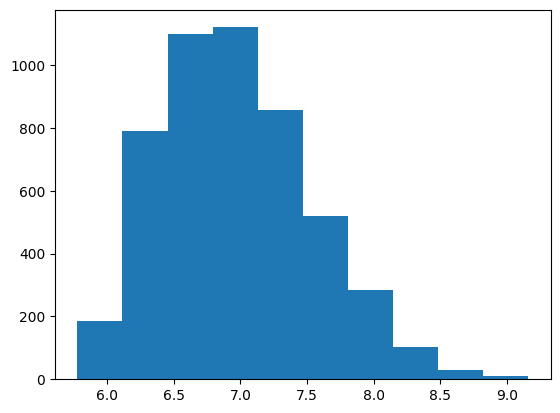

In [4]:
plt.hist(games['avg_rating'])
plt.show()

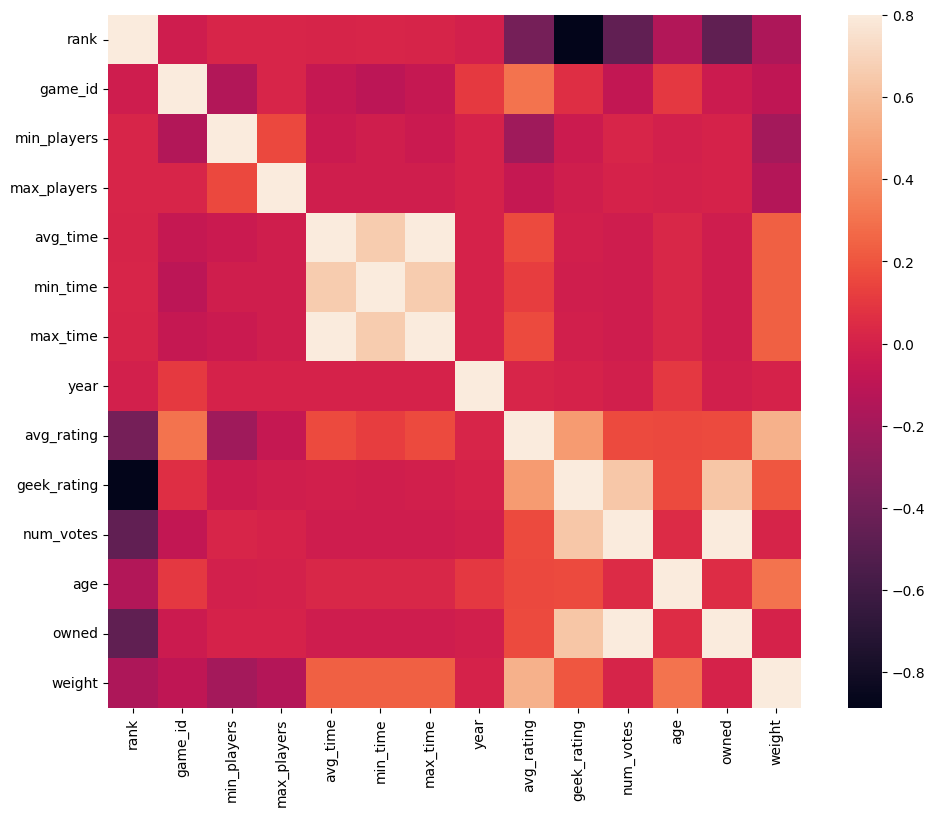

In [6]:
numeric_cols = games.select_dtypes(include=[np.number])
# Compute the correlation matrix
corrmat = numeric_cols.corr()
# Plot the heatmap
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [7]:
columns=games.columns.tolist()
columns=[c for c in columns if c not in ['avg_rating','bgg_url','game_id','names','image_url','mechanic','category','designer']]
target='avg_rating'

In [8]:
x_train,x_test,y_train,y_test=train_test_split(games[columns],games[target],test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(3999, 12)
(1000, 12)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [11]:
predictions=model_lr.predict(x_test)
mean_squared_error(predictions,y_test)

0.1727380124024358

In [12]:
from sklearn.ensemble import RandomForestRegressor
model_rfr=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=5)
model_rfr.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=10, random_state=5)

In [13]:
predictions=model_rfr.predict(x_test)
mean_squared_error(predictions,y_test)

0.027368298740349795

In [14]:
rating_lr=model_lr.predict(games[columns].iloc[100].values.reshape(1,-1))
rating_rfr=model_rfr.predict(games[columns].iloc[100].values.reshape(1,-1))

print("Actual rating is                :"+str(games[target].iloc[100]))
print("LinearRegressor rating          :"+str(rating_lr))
print("RandomForestRegressor rating is :"+str(rating_rfr))


Actual rating is                :8.00093
LinearRegressor rating          :[8.15456297]
RandomForestRegressor rating is :[7.77011256]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
